In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle,islice
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.linear_model import Ridge
from pandas.plotting import parallel_coordinates
%matplotlib inline

In [ ]:
data=pd.read_csv("dt.csv",index_col="DATE")
print(data.shape)
data.head(50)

(209, 20)


,STATION,NAME,CDSD,CLDD,DP01,DP10,DT00,DT32,DX32,DX70,DX90,EMNT,EMXP,EMXT,HDSD,HTDD,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,,,,,,,,,,,,,,,
2000-01,IN019131301,"JAIPUR SANGANER, IN",NaN,NaN,NaN,NaN,NaN,NaN,0.0,26.0,0.0,NaN,NaN,82.0,NaN,NaN,NaN,NaN,75.8,NaN
2000-02,IN019131301,"JAIPUR SANGANER, IN",NaN,NaN,NaN,NaN,NaN,NaN,0.0,26.0,1.0,NaN,NaN,92.0,NaN,NaN,NaN,NaN,76.5,NaN
2000-03,IN019131301,"JAIPUR SANGANER, IN",NaN,261.0,NaN,NaN,0.0,0.0,0.0,30.0,13.0,53.0,NaN,103.0,NaN,0.0,NaN,75.2,90.2,60.1
2000-05,IN019131301,"JAIPUR SANGANER, IN",NaN,NaN,NaN,NaN,NaN,NaN,0.0,29.0,29.0,NaN,NaN,112.0,NaN,NaN,NaN,NaN,106.0,NaN
2000-06,IN019131301,"JAIPUR SANGANER, IN",NaN,NaN,NaN,NaN,NaN,NaN,0.0,29.0,29.0,NaN,NaN,108.0,NaN,NaN,NaN,NaN,104.1,NaN
2000-07,IN019131301,"JAIPUR SANGANER, IN",NaN,NaN,NaN,NaN,NaN,NaN,0.0,30.0,21.0,NaN,NaN,106.0,NaN,NaN,NaN,NaN,95.1,NaN
2000-08,IN019131301,"JAIPUR SANGANER, IN",NaN,NaN,NaN,NaN,NaN,NaN,0.0,30.0,23.0,NaN,NaN,98.0,NaN,NaN,NaN,NaN,92.2,NaN
2000-09,IN019131301,"JAIPUR SANGANER, IN",NaN,NaN,NaN,NaN,NaN,NaN,0.0,30.0,30.0,NaN,NaN,99.0,NaN,NaN,NaN,NaN,95.0,NaN
2000-10,IN019131301,"JAIPUR SANGANER, IN",NaN,501.0,NaN,NaN,0.0,0.0,0.0,30.0,30.0,61.0,NaN,100.0,NaN,0.0,NaN,83.6,98.0,69.2


In [ ]:
data.loc["2000-01":"2000-03",:]

,STATION,NAME,CDSD,CLDD,DP01,DP10,DT00,DT32,DX32,DX70,DX90,EMNT,EMXP,EMXT,HDSD,HTDD,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,,,,,,,,,,,,,,,
2000-01,IN019131301,"JAIPUR SANGANER, IN",NaN,NaN,NaN,NaN,NaN,NaN,0.0,26.0,0.0,NaN,NaN,82.0,NaN,NaN,NaN,NaN,75.8,NaN
2000-02,IN019131301,"JAIPUR SANGANER, IN",NaN,NaN,NaN,NaN,NaN,NaN,0.0,26.0,1.0,NaN,NaN,92.0,NaN,NaN,NaN,NaN,76.5,NaN
2000-03,IN019131301,"JAIPUR SANGANER, IN",NaN,261.0,NaN,NaN,0.0,0.0,0.0,30.0,13.0,53.0,NaN,103.0,NaN,0.0,NaN,75.2,90.2,60.1


In [ ]:
data.apply(pd.isnull).sum()/data.shape[0]

,0
STATION,0.000000
NAME,0.000000
CDSD,0.928230
CLDD,0.684211
DP01,0.842105
DP10,0.842105
DT00,0.430622
DT32,0.430622
DX32,0.129187
DX70,0.129187


In [ ]:
data.shape[0]

209

In [ ]:
data.shape[1]

20

In [ ]:
core_data=data[["PRCP","HTDD","TMIN","TMAX"]].copy()

In [ ]:
core_data

,PRCP,HTDD,TMIN,TMAX
DATE,,,,
2000-01,NaN,NaN,NaN,75.8
2000-02,NaN,NaN,NaN,76.5
2000-03,NaN,0.0,60.1,90.2
2000-05,NaN,NaN,NaN,106.0
2000-06,NaN,NaN,NaN,104.1
...,...,...,...,...
2022-08,NaN,NaN,NaN,90.6
2022-12,NaN,NaN,50.3,NaN
2023-02,NaN,NaN,56.2,NaN


In [ ]:
#to rename col_names_
core_data.columns=["precipitation","HTDD","min_Tem","max_Tem"]
core_data

,precipitation,HTDD,min_Tem,max_Tem
DATE,,,,
2000-01,NaN,NaN,NaN,75.8
2000-02,NaN,NaN,NaN,76.5
2000-03,NaN,0.0,60.1,90.2
2000-05,NaN,NaN,NaN,106.0
2000-06,NaN,NaN,NaN,104.1
...,...,...,...,...
2022-08,NaN,NaN,NaN,90.6
2022-12,NaN,NaN,50.3,NaN
2023-02,NaN,NaN,56.2,NaN


In [ ]:
core_data.apply(pd.isnull).sum()/data.shape[0]

,0
precipitation,0.842105
HTDD,0.684211
min_Tem,0.430622
max_Tem,0.129187


In [ ]:
core_data["precipitation"].value_counts()

,count
precipitation,
0.00,15
10.59,1
21.24,1
5.63,1
17.09,1
2.60,1
0.08,1
0.03,1
0.02,1


In [ ]:
core_data[pd.isnull(core_data["precipitation"])]

,precipitation,HTDD,min_Tem,max_Tem
DATE,,,,
2000-01,NaN,NaN,NaN,75.8
2000-02,NaN,NaN,NaN,76.5
2000-03,NaN,0.0,60.1,90.2
2000-05,NaN,NaN,NaN,106.0
2000-06,NaN,NaN,NaN,104.1
...,...,...,...,...
2022-08,NaN,NaN,NaN,90.6
2022-12,NaN,NaN,50.3,NaN
2023-02,NaN,NaN,56.2,NaN


In [ ]:
core_data.loc["2000-10":"2000-12"]

,precipitation,HTDD,min_Tem,max_Tem
DATE,,,,
2000-10,NaN,0.0,69.2,98.0
2000-11,NaN,3.0,58.9,87.5
2000-12,NaN,55.0,47.6,80.6


In [ ]:
core_data.loc["2000-01":"2024-01",:]

,precipitation,HTDD,min_Tem,max_Tem
DATE,,,,
2000-01,NaN,NaN,NaN,75.8
2000-02,NaN,NaN,NaN,76.5
2000-03,NaN,0.0,60.1,90.2
2000-05,NaN,NaN,NaN,106.0
2000-06,NaN,NaN,NaN,104.1
...,...,...,...,...
2022-08,NaN,NaN,NaN,90.6
2022-12,NaN,NaN,50.3,NaN
2023-02,NaN,NaN,56.2,NaN


In [ ]:
core_data["precipitation"].value_counts()

,count
precipitation,
0.00,15
10.59,1
21.24,1
5.63,1
17.09,1
2.60,1
0.08,1
0.03,1
0.02,1


In [ ]:
core_data["precipitation"]=core_data["precipitation"].fillna(0)

In [ ]:
core_data["precipitation"].value_counts()

,count
precipitation,
0.00,191
10.59,1
21.24,1
5.63,1
17.09,1
2.60,1
0.08,1
0.03,1
0.02,1


In [ ]:
core_data["HTDD"].fillna(0)

,HTDD
DATE,
2000-01,0.0
2000-02,0.0
2000-03,0.0
2000-05,0.0
2000-06,0.0
...,...
2022-08,0.0
2022-12,0.0
2023-02,0.0


In [ ]:
core_data["min_Tem"].fillna(0)

,min_Tem
DATE,
2000-01,0.0
2000-02,0.0
2000-03,60.1
2000-05,0.0
2000-06,0.0
...,...
2022-08,0.0
2022-12,50.3
2023-02,56.2


In [ ]:
core_data["max_Tem"].fillna(0)

,max_Tem
DATE,
2000-01,75.8
2000-02,76.5
2000-03,90.2
2000-05,106.0
2000-06,104.1
...,...
2022-08,90.6
2022-12,0.0
2023-02,0.0


In [ ]:
core_data=core_data.fillna(method="ffill")
core_data.apply(pd.isnull).sum()/core_data.shape[0]

<ipython-input-25-d87afe347197>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  core_data=core_data.fillna(method="ffill")


,0
precipitation,0.000000
HTDD,0.009569
min_Tem,0.009569
max_Tem,0.000000


In [ ]:
core_data.dtypes

,0
precipitation,float64
HTDD,float64
min_Tem,float64
max_Tem,float64


In [ ]:
core_data.index

Index(['2000-01', '2000-02', '2000-03', '2000-05', '2000-06', '2000-07',
       '2000-08', '2000-09', '2000-10', '2000-11',
       ...
       '2020-11', '2020-12', '2021-01', '2022-05', '2022-07', '2022-08',
       '2022-12', '2023-02', '2023-11', '2023-12'],
      dtype='object', name='DATE', length=209)

In [ ]:
core_data.index=pd.to_datetime(core_data.index)

In [ ]:
core_data.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-05-01',
               '2000-06-01', '2000-07-01', '2000-08-01', '2000-09-01',
               '2000-10-01', '2000-11-01',
               ...
               '2020-11-01', '2020-12-01', '2021-01-01', '2022-05-01',
               '2022-07-01', '2022-08-01', '2022-12-01', '2023-02-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='DATE', length=209, freq=None)

In [ ]:
core_data.index.year

Index([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
       ...
       2020, 2020, 2021, 2022, 2022, 2022, 2022, 2023, 2023, 2023],
      dtype='int32', name='DATE', length=209)

In [ ]:
core_data.apply(lambda x:(x==0).sum())

,0
precipitation,191
HTDD,95
min_Tem,0
max_Tem,0


<Axes: xlabel='DATE'>

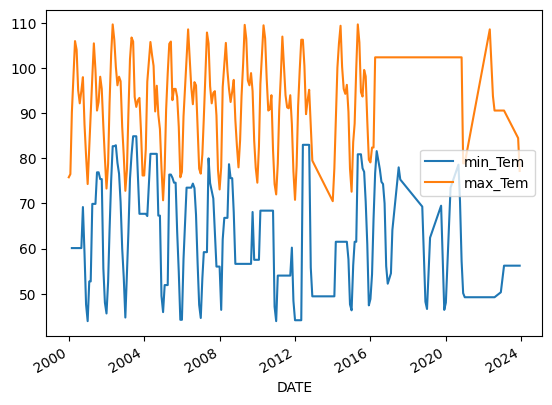

In [ ]:
core_data[["min_Tem","max_Tem"]].plot()

In [ ]:
core_data.index.year.value_counts()

,count
DATE,
2001,12
2002,12
2003,12
2005,12
2015,12
2014,12
2008,12
2009,12
2012,12


In [ ]:
core_data.index.year.value_counts().sort_index()

,count
DATE,
2000,11
2001,12
2002,12
2003,12
2004,11
2005,12
2006,11
2007,11
2008,12


<Axes: xlabel='DATE'>

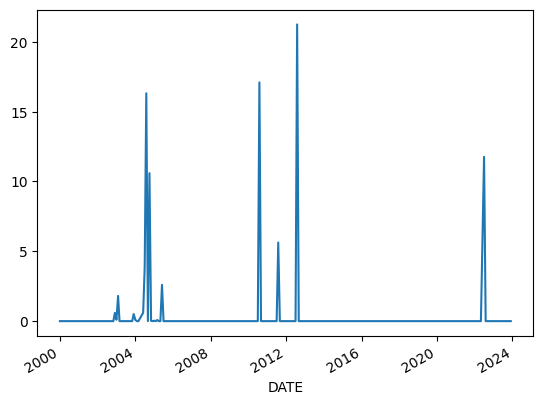

In [ ]:
core_data["precipitation"].plot()

In [ ]:
core_data.groupby(core_data.index.year).apply

<bound method GroupBy.apply of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7c4e53257430>>

In [ ]:
core_data.groupby(core_data.index.year).sum()

,precipitation,HTDD,min_Tem,max_Tem
DATE,,,,
2000,0.00,58.0,536.3,1001.0
2001,0.00,257.0,767.2,1094.1
2002,0.59,225.0,825.0,1122.7
2003,2.42,385.0,853.0,1088.2
2004,31.89,0.0,791.7,1005.0
2005,2.71,585.0,742.0,1089.5
2006,0.00,738.0,715.4,1024.3
2007,0.00,179.0,690.5,1004.3
2008,0.00,4.0,775.9,1104.2


In [ ]:
core_data["target"]=core_data.shift(-1)["max_Tem"]
core_data

,precipitation,HTDD,min_Tem,max_Tem,target
DATE,,,,,
2000-01-01,0.0,NaN,NaN,75.8,76.5
2000-02-01,0.0,NaN,NaN,76.5,90.2
2000-03-01,0.0,0.0,60.1,90.2,106.0
2000-05-01,0.0,0.0,60.1,106.0,104.1
2000-06-01,0.0,0.0,60.1,104.1,95.1
...,...,...,...,...,...
2022-08-01,0.0,89.0,49.2,90.6,90.6
2022-12-01,0.0,89.0,50.3,90.6,90.6
2023-02-01,0.0,89.0,56.2,90.6,84.5


In [ ]:
core_data["precipitation"] = core_data["precipitation"].fillna(0)
core_data["HTDD"] = core_data["HTDD"].fillna(0)
core_data["min_Tem"] = core_data["min_Tem"].fillna(0)
core_data["max_Tem"] = core_data["max_Tem"].fillna(0)
core_data["target"] = core_data["target"].fillna(0)
reg=Ridge(alpha=.1)
# Redefine 'train' after filling NaNs in 'core_data'
train = core_data.loc[:"2018-01-01"]
test=core_data.loc["2019-01-01":]
predictors=["precipitation","HTDD","min_Tem","max_Tem"]
reg.fit(train[predictors],train["target"])


Ridge(alpha=0.1)

In [ ]:
predictions=reg.predict(test[predictors])
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(test["target"],predictions)

8.116539274914835e-05

In [ ]:
combined=pd.concat([test["target"],pd.Series(predictions,index=test.index)],axis=1)
combined

,target,0
DATE,,
2019-01-01,102.4,102.439100
2019-03-01,102.4,101.911702
2019-10-01,102.4,101.674707
2019-12-01,102.4,102.445776
2020-01-01,102.4,102.392368
2020-04-01,102.4,101.541189
2020-09-01,102.4,101.370953
2020-10-01,102.4,101.641327
2020-11-01,78.9,102.085276


<Axes: xlabel='DATE'>

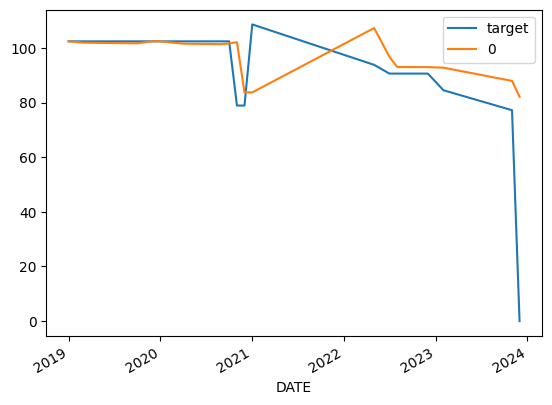

In [ ]:
combined.plot()

In [ ]:
reg.coef_

array([ 0.10255952,  0.02568952, -0.0333796 ,  0.7927823 ])

In [ ]:
def create_predictions(predictors,core_data,reg):
  train=core_data.loc[:"2018-01-01"]
  test=core_data.loc["2019-01-01":]
  reg.fit(train[predictors],train["target"])
  predictions=reg.predict(test[predictors])
  error=mean_absolute_error(test["target"],predictions)
  combined=pd.concat([test["target"],pd.Series(predictions,index=test.index)],axis=1)
  combined.columns=["actual","predictions"]
  combined.columns=["actual","predictions"]
  return error,combined

In [ ]:
core_data["month_max"]=core_data["max_Tem"].rolling(5).mean()
core_data

,precipitation,HTDD,min_Tem,max_Tem,target,month_max,month_day_max,max_min,monthly_avg,day_of_year
DATE,,,,,,,,,,
2007-11-01,0.0,0.0,56.0,89.5,77.4,NaN,1.043799,1.598214,89.500000,89.500000
2007-12-01,0.0,0.0,56.0,77.4,73.1,NaN,1.158915,1.382143,77.400000,77.400000
2008-01-01,0.0,0.0,56.0,73.1,78.1,NaN,1.174829,1.305357,73.100000,73.100000
2008-02-01,0.0,0.0,46.4,78.1,95.8,NaN,1.057618,1.683190,78.100000,78.100000
2008-03-01,0.0,0.0,62.0,95.8,100.8,82.78,0.864092,1.545161,95.800000,95.800000
...,...,...,...,...,...,...,...,...,...,...
2022-08-01,0.0,89.0,49.2,90.6,90.6,90.16,0.995143,1.841463,94.490000,94.314286
2022-12-01,0.0,89.0,50.3,90.6,90.6,92.50,1.020971,1.801193,84.853846,84.388889
2023-02-01,0.0,89.0,56.2,90.6,84.5,94.84,1.046799,1.612100,83.870000,83.870000


In [ ]:
core_data["month_day_max"]=core_data["month_max"]/core_data["max_Tem"]
core_data

,precipitation,HTDD,min_Tem,max_Tem,target,month_max,month_day_max,max_min,monthly_avg,day_of_year
DATE,,,,,,,,,,
2007-11-01,0.0,0.0,56.0,89.5,77.4,NaN,NaN,1.598214,89.500000,89.500000
2007-12-01,0.0,0.0,56.0,77.4,73.1,NaN,NaN,1.382143,77.400000,77.400000
2008-01-01,0.0,0.0,56.0,73.1,78.1,NaN,NaN,1.305357,73.100000,73.100000
2008-02-01,0.0,0.0,46.4,78.1,95.8,NaN,NaN,1.683190,78.100000,78.100000
2008-03-01,0.0,0.0,62.0,95.8,100.8,82.78,0.864092,1.545161,95.800000,95.800000
...,...,...,...,...,...,...,...,...,...,...
2022-08-01,0.0,89.0,49.2,90.6,90.6,90.16,0.995143,1.841463,94.490000,94.314286
2022-12-01,0.0,89.0,50.3,90.6,90.6,92.50,1.020971,1.801193,84.853846,84.388889
2023-02-01,0.0,89.0,56.2,90.6,84.5,94.84,1.046799,1.612100,83.870000,83.870000


In [ ]:
core_data["max_min"]=core_data["max_Tem"]/core_data["min_Tem"]
core_data

,precipitation,HTDD,min_Tem,max_Tem,target,month_max,month_day_max,max_min,monthly_avg,day_of_year
DATE,,,,,,,,,,
2007-11-01,0.0,0.0,56.0,89.5,77.4,NaN,NaN,1.598214,89.500000,89.500000
2007-12-01,0.0,0.0,56.0,77.4,73.1,NaN,NaN,1.382143,77.400000,77.400000
2008-01-01,0.0,0.0,56.0,73.1,78.1,NaN,NaN,1.305357,73.100000,73.100000
2008-02-01,0.0,0.0,46.4,78.1,95.8,NaN,NaN,1.683190,78.100000,78.100000
2008-03-01,0.0,0.0,62.0,95.8,100.8,82.78,0.864092,1.545161,95.800000,95.800000
...,...,...,...,...,...,...,...,...,...,...
2022-08-01,0.0,89.0,49.2,90.6,90.6,90.16,0.995143,1.841463,94.490000,94.314286
2022-12-01,0.0,89.0,50.3,90.6,90.6,92.50,1.020971,1.801193,84.853846,84.388889
2023-02-01,0.0,89.0,56.2,90.6,84.5,94.84,1.046799,1.612100,83.870000,83.870000


In [ ]:
predictors=["precipitation","max_Tem","min_Tem","month_max","month_day_max","max_min"]

In [ ]:
core_data=core_data.iloc[30:,:].copy()

In [ ]:
error,combined=create_predictions(predictors,core_data,reg)
error

11.661140655472742

In [ ]:
combined

,actual,predictions
DATE,,
2019-01-01,102.4,96.820418
2019-03-01,102.4,96.268889
2019-10-01,102.4,96.452300
2019-12-01,102.4,96.840113
2020-01-01,102.4,96.694126
2020-04-01,102.4,96.630294
2020-09-01,102.4,96.919197
2020-10-01,102.4,96.492333
2020-11-01,78.9,96.272768


<Axes: xlabel='DATE'>

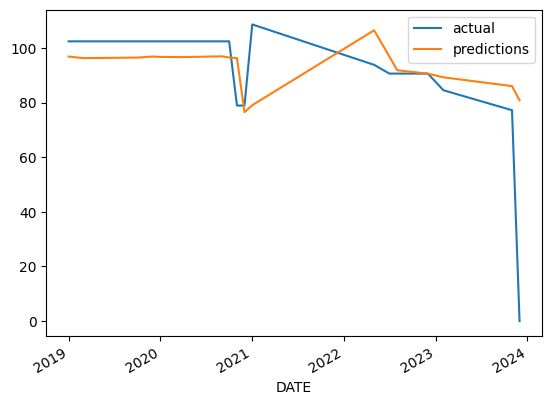

In [ ]:
combined.plot()

In [ ]:
core_data["monthly_avg"] = core_data["max_Tem"].groupby(core_data.index.month).transform(lambda x: x.expanding(1).mean())
# Use transform to align the result with the original DataFrame's index
core_data

,precipitation,HTDD,min_Tem,max_Tem,target,month_max,month_day_max,max_min,monthly_avg,day_of_year
DATE,,,,,,,,,,
2010-06-01,0.00,0.0,68.4,106.6,97.7,93.96,0.881426,1.558480,106.600000,106.550000
2010-07-01,0.00,0.0,68.4,97.7,90.6,98.58,1.009007,1.428363,97.700000,97.500000
2010-08-01,17.09,0.0,68.4,90.6,90.9,100.18,1.105740,1.324561,90.600000,93.400000
2010-09-01,0.00,0.0,68.4,90.9,94.0,99.06,1.089769,1.328947,90.900000,94.900000
2010-10-01,0.00,0.0,68.4,94.0,81.8,95.96,1.020851,1.374269,94.000000,94.450000
...,...,...,...,...,...,...,...,...,...,...
2022-08-01,0.00,89.0,49.2,90.6,90.6,90.16,0.995143,1.841463,94.525000,94.314286
2022-12-01,0.00,89.0,50.3,90.6,90.6,92.50,1.020971,1.801193,86.500000,84.388889
2023-02-01,0.00,89.0,56.2,90.6,84.5,94.84,1.046799,1.612100,84.857143,83.870000


In [ ]:
core_data["day_of_year_avg"]=core_data["max_Tem"].groupby(core_data.index.day_of_year).transform(lambda x:x.expanding(1).mean())
core_data

,precipitation,HTDD,min_Tem,max_Tem,target,month_max,month_day_max,max_min,monthly_avg,day_of_year,day_of_year_avg
DATE,,,,,,,,,,,
2010-06-01,0.00,0.0,68.4,106.6,97.7,93.96,0.881426,1.558480,106.600000,106.600000,106.600000
2010-07-01,0.00,0.0,68.4,97.7,90.6,98.58,1.009007,1.428363,97.700000,97.700000,97.700000
2010-08-01,17.09,0.0,68.4,90.6,90.9,100.18,1.105740,1.324561,90.600000,90.600000,90.600000
2010-09-01,0.00,0.0,68.4,90.9,94.0,99.06,1.089769,1.328947,90.900000,90.900000,90.900000
2010-10-01,0.00,0.0,68.4,94.0,81.8,95.96,1.020851,1.374269,94.000000,94.000000,94.000000
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,0.00,89.0,49.2,90.6,90.6,90.16,0.995143,1.841463,94.525000,94.000000,94.000000
2022-12-01,0.00,89.0,50.3,90.6,90.6,92.50,1.020971,1.801193,86.500000,86.314286,86.314286
2023-02-01,0.00,89.0,56.2,90.6,84.5,94.84,1.046799,1.612100,84.857143,84.857143,84.857143


In [ ]:
predictors=["precipitation","max_Tem","min_Tem","month_day_max","max_min","day_of_year_avg","monthly_avg"]

In [ ]:
error,combined=create_predictions(predictors,core_data,reg)
error

10.693393593630264

<Axes: xlabel='DATE'>

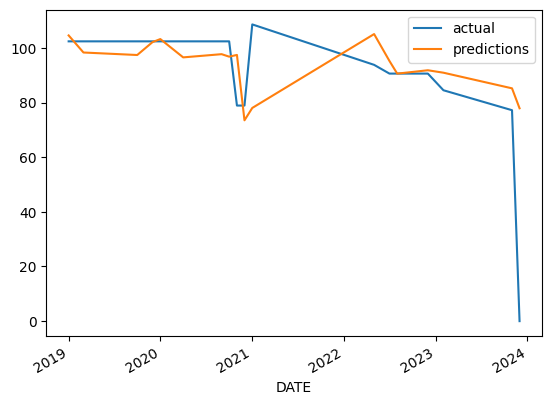

In [ ]:
combined.plot()

In [ ]:
reg.coef_

array([ 2.48519428e-01,  5.58028504e-01,  2.40195608e-01, -4.41229086e+01,
        8.67486003e+00, -3.10216296e-01, -9.29904685e-03])

In [ ]:
core_data.corr()["target"]

,target
precipitation,-0.010593
HTDD,0.007630
min_Tem,0.258489
max_Tem,0.623630
target,1.000000
month_max,0.230094
month_day_max,-0.571784
max_min,0.157995
monthly_avg,0.466664
day_of_year,0.477392


In [ ]:
combined["diff"]=(combined["actual"]-combined["predictions"]).abs()

In [ ]:
combined.sort_values("diff",ascending=False).head()

,actual,predictions,diff
DATE,,,
2023-12-01,0.0,77.907542,77.907542
2021-01-01,108.6,78.025007,30.574993
2020-11-01,78.9,97.427879,18.527879
2022-05-01,93.8,105.061771,11.261771
2023-11-01,77.2,85.204884,8.004884
